In [2]:
# Librerías principales
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Cargar dataset
df = pd.read_csv("f1_clean_Dataset.csv")

# Mostrar primeras filas
df.head()

,resultId,raceId,driverId,constructorId,number_x,grid,position,points,laps,time,...,dob,nationality,url,year,race_name,round,circuitId,date,team_name,driver_fullname
0,1,18,1,1,22,1,1,10.0,58,1:34:50.616,...,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,2008,Australian Grand Prix,1,1,2008-03-16,McLaren,Lewis Hamilton
1,2,18,2,2,3,5,2,8.0,58,+5.478,...,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld,2008,Australian Grand Prix,1,1,2008-03-16,BMW Sauber,Nick Heidfeld
2,3,18,3,3,7,7,3,6.0,58,+8.163,...,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg,2008,Australian Grand Prix,1,1,2008-03-16,Williams,Nico Rosberg
3,4,18,4,4,5,11,4,5.0,58,+17.181,...,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso,2008,Australian Grand Prix,1,1,2008-03-16,Renault,Fernando Alonso
4,5,18,5,1,23,3,5,4.0,58,+18.014,...,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen,2008,Australian Grand Prix,1,1,2008-03-16,McLaren,Heikki Kovalainen


In [29]:
# Reemoplazar valores \\N por NA
df = df.replace('\\N', pd.NA)

# Seleccionar columnas clave
data = df[['points', 'position', 'grid', 'laps', 'constructorId', 'circuitId', 'driverId']].dropna()

# Variables independientes (X) y dependiente (y)
X = data[['position', 'grid', 'laps', 'constructorId', 'circuitId', 'driverId']]

y = data['points']

# Convertir variables categóricas a numéricas mediante One-Hot Encoding (Convierte variables categóricas (como "rojo", "verde", "azul") en un formato numérico para el modelo)
X = pd.get_dummies(X, columns=['constructorId','circuitId','driverId'], drop_first=True)

In [30]:
# Separar en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear modelo de regresión lineal
model = LinearRegression()

# Entrenar
model.fit(X_train, y_train)

# Predecir
y_pred = model.predict(X_test)

In [31]:
# Calcular métricas
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Error cuadrático medio (MSE):", round(mse, 2))
print("Coeficiente de determinación (R²):", round(r2, 3))

Error cuadrático medio (MSE): 7.85
Coeficiente de determinación (R²): 0.73


El modelo tiene una capacidad de predicción del 73%

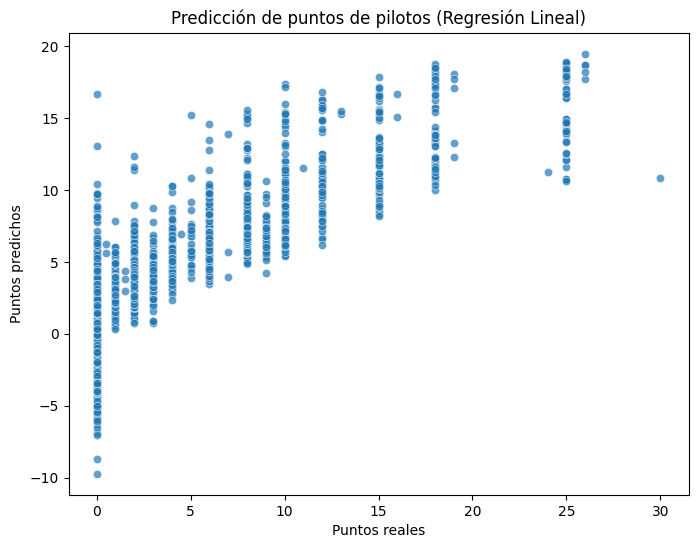

In [21]:
# Comparar valores reales vs predichos
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.xlabel("Puntos reales")
plt.ylabel("Puntos predichos")
plt.title("Predicción de puntos de pilotos (Regresión Lineal)")
plt.show()

## Aplicar el modelo

In [ ]:
# Predecir los puntos de la temporada de Lewis Hamilton

# Filtrar filas del piloto
piloto_datos = data[data['driverId'] == 1][['points','position','grid','laps','constructorId','circuitId','driverId']]

X_piloto = piloto_datos[['position','grid','laps','constructorId','circuitId','driverId']]
y_real = piloto_datos['points']

X_piloto_encoded = pd.get_dummies(X_piloto, columns=['constructorId','circuitId','driverId'], drop_first=True)

# Alinear con las columnas usadas en el entrenamiento
X_piloto_encoded = X_piloto_encoded.reindex(columns=X_train.columns, fill_value=0)

predicciones = model.predict(X_piloto_encoded)

comparacion = pd.DataFrame({
    'Puntos_Reales': y_real,
    'Predicciones': predicciones
})

print(comparacion)


       Puntos_Reales  Predicciones
0               10.0     13.144078
26               4.0      9.580747
56               0.0      4.676463
68               6.0     11.410636
89               8.0     12.321994
...              ...           ...
26662           12.0     15.657851
26688            1.0     10.464747
26700           18.0     16.697019
26730            0.0     10.403405
26742           12.0     15.284985

[326 rows x 2 columns]


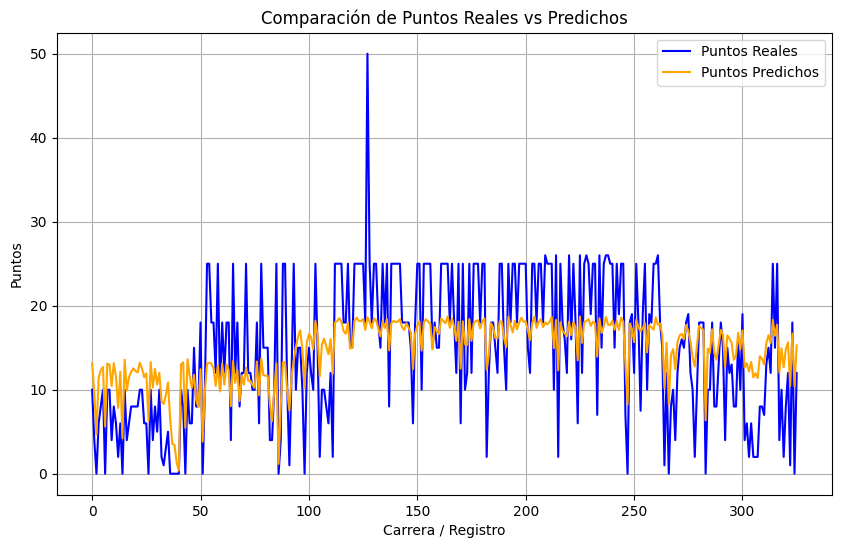

In [28]:
plt.figure(figsize=(10,6))

# Línea de puntos reales
plt.plot(y_real.values, label='Puntos Reales', color='blue')

# Línea de predicciones
plt.plot(predicciones, label='Puntos Predichos', color='orange')

plt.xlabel('Carrera / Registro')
plt.ylabel('Puntos')
plt.title('Comparación de Puntos Reales vs Predichos')
plt.legend()
plt.grid(True)
plt.show()